<a href="https://colab.research.google.com/github/Plutoftw/ST1-Group-10/blob/main/ST1_Group_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
By looking at the data our problem is an app that is able to predict the prices of cars based on inputs from the user. This will aid users in making sure they are paying a fair price for their cars.

In [ ]:
# ‘’’
# *******************************
# Author: Group 10
# u123456 Assessment 3 19/ 10/2024
# Programming:
# *******************************
# ‘’’

# Explanation of imports:

*   **Pandas**

    A Python library used for data manipulation and analysis
*   **matplotlib**

    A module of Matplotlib that provides functions for creating static, interactive, and animated visualizations, primarily used for 2D plotting.
*   **seaborn**

    A data visualization library built on top of Matplotlib, providing a high-level interface for creating attractive and informative statistical graphics.
*   **numpy**

    A library for efficient numerical computing, used for working with arrays and performing mathematical operations on them.
*   **scipy**

    A module for performing statistical analysis, including tests, probability distributions, and data summaries.


---



# Cleaning the data

This is done by dropping duplicates and un-used columns New_Price and Unamed

The info of the cleaned data is shown to confirm that their have been changes made to the data

The head is shown to display the first few rows of the cleaned data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Step 1: Loading and inspecting the dataset
file_path = 'train-data.csv'
df = pd.read_csv(file_path)

print("Uncleaned Data")
print(df.info())

# Removing duplicates
df_cleaned = df.drop_duplicates()
df_cleaned = df.drop("New_Price", axis=1)
df_cleaned = df_cleaned.drop("Unnamed: 0", axis=1)

#Multiply Price by 1000 to get more realistic results
df_cleaned['Price'] = df_cleaned['Price'] * 1000

# Basic info about the dataset
print("Cleaned Data")
print(df_cleaned.info())

# Displaying first few rows
print(df_cleaned.head())

Uncleaned Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB
None
Cleaned Data
<class 'pandas.core.frame.Da

# Cleaning Data
This section the data is cleaned to allow for it to be processed by AI models.


---
# Target Variable
The target Variable of Price is then selected. We choose price as our target as it is want we want the AI models to predict later on in the assignment

We then make a histogram graph that shows the Varience in our Target Variable Price


count      6019.000000
mean       9479.468350
std       11187.917112
min         440.000000
25%        3500.000000
50%        5640.000000
75%        9950.000000
max      160000.000000
Name: Price, dtype: float64


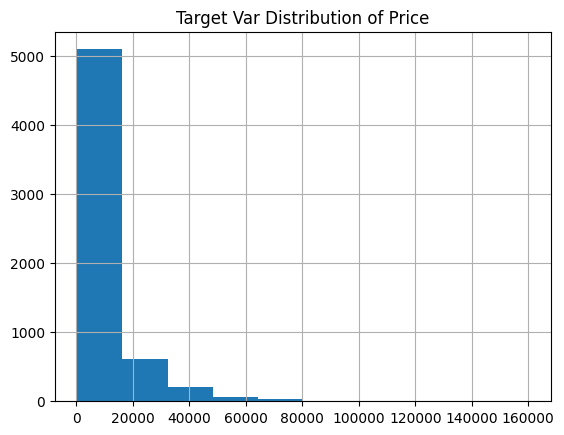

In [ ]:
# Step 3: Cleaning the all data columns to contain only numeric values\
removeStringFromColumn = ["Mileage", "Power", "Engine"]

for column in removeStringFromColumn:
    df_cleaned[column] = df_cleaned[column].str.extract('([0-9.]+)').astype(float)


# Displaying the distribution of the target variable 'Year'
print(df_cleaned['Price'].describe())
df_cleaned['Price'].hist()
plt.title('Target Var Distribution of Price')
plt.show()

# Outlier Analysis
To start our outlier Analysis we first had to sort all of our numerical data so that we can find the quartiles.

Using a for loop we are able to sort through all the numerical (continous data)

In the loop we find the first and third quartile by using the numpy function **Percentile** the third quartile.

To find the Inter Quartile Range of our we subtract the first quartile by the 3rd. The IQR is crucial to finding outliers as it is how we calculate the upper and lower limits using:

    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

Using the upper and lower limits we were able to eliminate all data outside of the upper and lower limits therefore removing outliers.

In [ ]:
# Select all numeric columns
continuousColumns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Initialize a new dataframe to hold the cleaned data
cleaned_dfs = {}

# Loop through each numeric column to remove outliers
for column in continuousColumns:
    # Get the initial number of rows before removing outliers
    initial_rows = df_cleaned[column].dropna().shape[0]

    q3, q1 = np.percentile(df_cleaned[column].dropna(), [75, 25])
    print(f"Upper Quartile for {column}: {q3}, Lower Quartile: {q1}")

    iqr = q3 - q1
    print(f"IQR for {column}: {iqr}")

    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    print(f"Upper Limit for {column}: {upper_limit}, Lower Limit: {lower_limit}")

    # Filter the data for the current column to remove outliers
    cleaned_dfs[column] = df_cleaned[(df_cleaned[column] <= upper_limit) & (df_cleaned[column] >= lower_limit)]


    # Get the number of rows after removing outliers
    final_rows = cleaned_dfs[column].dropna().shape[0]

    # Calculate the number of outliers removed
    outliers_removed = initial_rows - final_rows
    print(f"Number of outliers removed from {column}: {outliers_removed}")

print(df_cleaned.describe())

Upper Quartile for Year: 2016.0, Lower Quartile: 2011.0
IQR for Year: 5.0
Upper Limit for Year: 2023.5, Lower Limit: 2003.5
Number of outliers removed from Year: 185
Upper Quartile for Kilometers_Driven: 73000.0, Lower Quartile: 34000.0
IQR for Kilometers_Driven: 39000.0
Upper Limit for Kilometers_Driven: 131500.0, Lower Limit: -24500.0
Number of outliers removed from Kilometers_Driven: 341
Upper Quartile for Mileage: 21.1, Lower Quartile: 15.17
IQR for Mileage: 5.9300000000000015
Upper Limit for Mileage: 29.995000000000005, Lower Limit: 6.274999999999997
Number of outliers removed from Mileage: 187
Upper Quartile for Engine: 1984.0, Lower Quartile: 1198.0
IQR for Engine: 786.0
Upper Limit for Engine: 3163.0, Lower Limit: 19.0
Number of outliers removed from Engine: 169
Upper Quartile for Power: 138.1, Lower Quartile: 75.0
IQR for Power: 63.099999999999994
Upper Limit for Power: 232.75, Lower Limit: -19.64999999999999
Number of outliers removed from Power: 242
Upper Quartile for Seats:

# Basic Data Exploration
Separating the data into three categories is crucial for making sure our AI model can process all the data.

# Visual Exploration Of Data
To create the graphs we start by setting up a plot that is 3x2 graphs. The size of the plot is 15x12 inches wide

Using a for loop to loop through the lists of the data types we want to make graphs for. The first loop goes through the quantitative columns.

For the catergorical columns we only create graphs for the first 2 being Fuel_Type and Transmision. As we are not using Owner_Type and Location for our analysis

We don't create graphs for the qualitative columns as they would provide no valuable data.

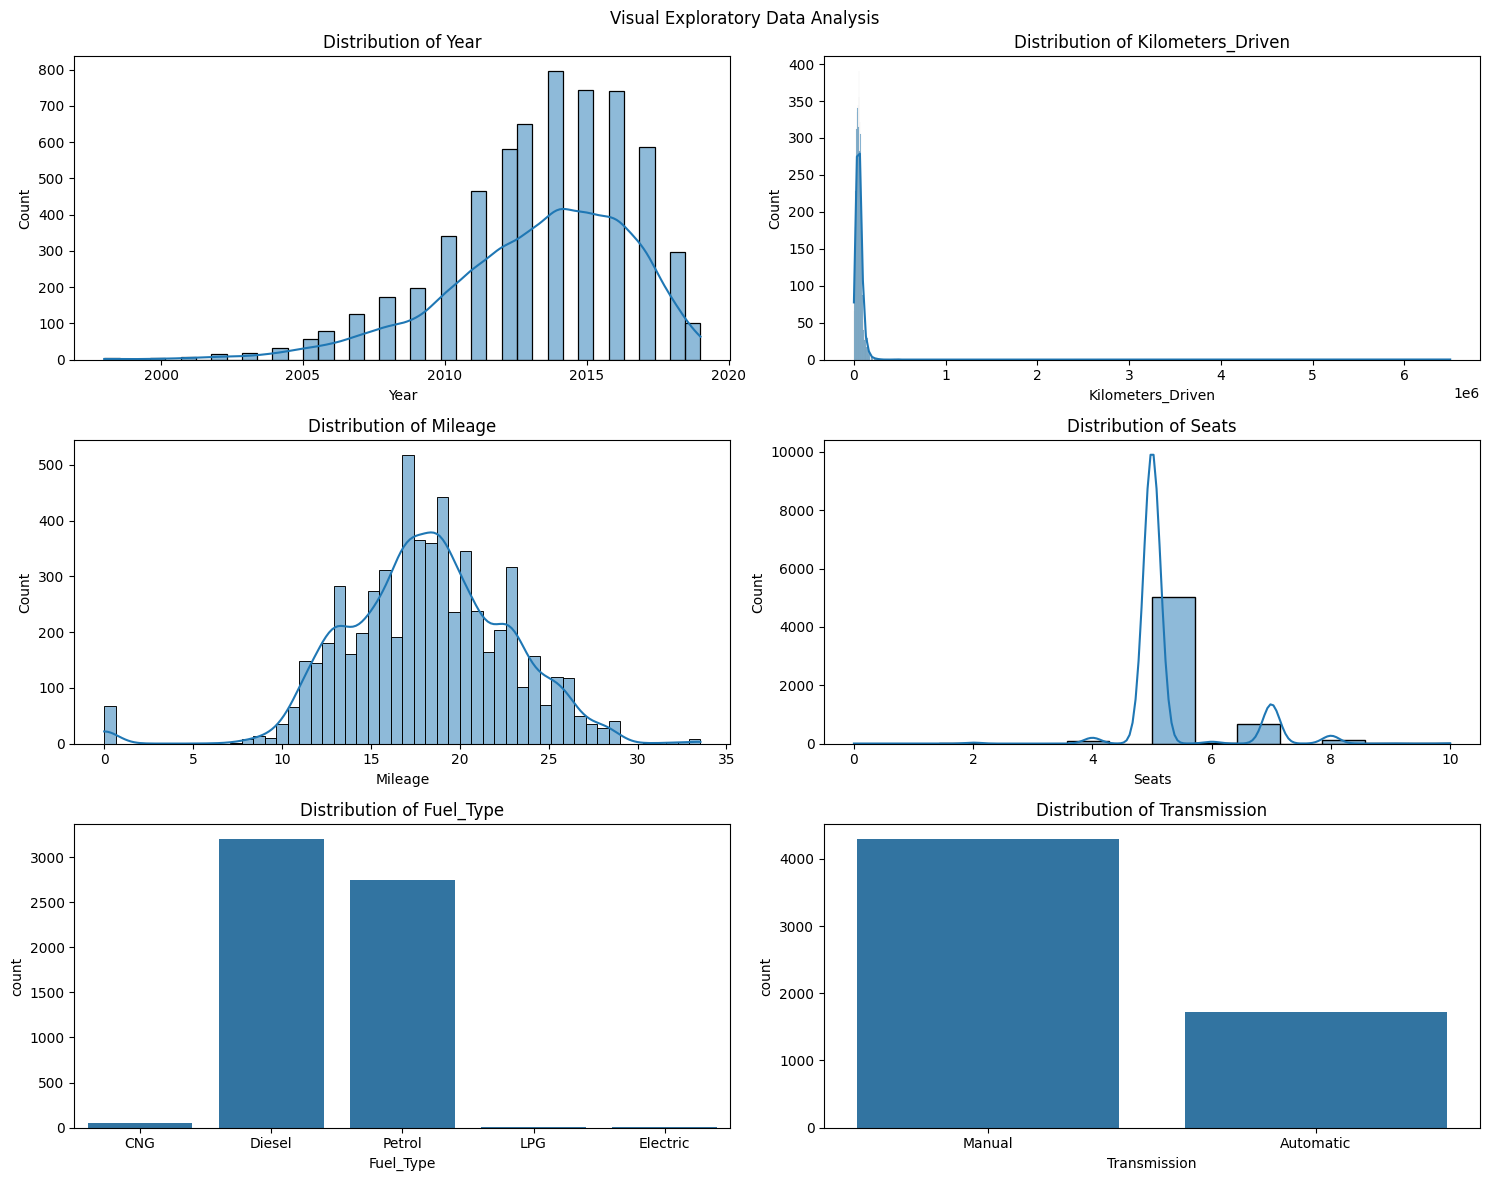

In [ ]:
# Step 4: Classifying columns and removing irrelevant ones
quantitative_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Seats']
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
qualitative_columns = ['Name', 'Unnamed: 0']

# Step 5: Visual EDA
# Setting up the visual layout creates a 3x2 grid of plots with a specified size 15 inches by 12 inches
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle("Visual Exploratory Data Analysis")

# Histograms for quantitative columns
for i, column in enumerate(quantitative_columns):
    sns.histplot(df_cleaned[column], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {column}')

# Bar plots for categorical columns
for i, column in enumerate(categorical_columns):
    if i < 2:
        sns.countplot(x=df_cleaned[column], ax=axes[2, i])
        axes[2, i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


#Missing Value Analysis

Firstly to find the missing values we need to create a data frame in the shape of df_cleaned with boolean values that indicate if their is a missing element. e.g if an element is missing it will return true.

We use Sum to count how many missing values there are for each column

reset_index converts the output into a new DataFrame with two columns being The Columns name and the amount of missing values.

We then print out this new data frame to show how many missing values there are in each of the columns in our data set.

For our continous columns we loop through and replace missing values with the median result from the data since it won't create more outliers

For the catergorical columns we replace it with the mode (the most common value)
this allows for these columns to still make sense and fit within our data set.

To confirm our data is completely clean we loop through all columns and if there is still missing values we drop the columns that contain missing values.

We then reprint the data with the new values to confirm we have removed all missing values from the data set

In [ ]:
# Step 6: Missing Value Analysis
print("## Step 6: Missing Value Analysis")

# Using isnull() and sum() directly in a single line to create and rename the DataFrame
missing_values = (df_cleaned.isnull().sum().reset_index(name='Missing Values').rename(columns={"index": "Column Name"}))

print(missing_values)

# Step 7: Handling missing values
for column in continuousColumns:
    df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].median())


for column in df_cleaned:
    df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mode()[0])
    df_cleaned.dropna(subset=[column], inplace=True)
   # df_cleaned.interpolate()

    # Using isnull() and sum() directly in a single line to create and rename the DataFrame
missing_values = (df_cleaned.isnull().sum().reset_index(name='Missing Values').rename(columns={"index": "Column Name"}))
print(f'{missing_values}')

print(df_cleaned.head())

## Step 6: Missing Value Analysis
          Column Name  Missing Values
0                Name               0
1            Location               0
2                Year               0
3   Kilometers_Driven               0
4           Fuel_Type               0
5        Transmission               0
6          Owner_Type               0
7             Mileage               2
8              Engine              36
9               Power             143
10              Seats              42
11              Price               0
          Column Name  Missing Values
0                Name               0
1            Location               0
2                Year               0
3   Kilometers_Driven               0
4           Fuel_Type               0
5        Transmission               0
6          Owner_Type               0
7             Mileage               0
8              Engine               0
9               Power               0
10              Seats               0
11              

#Pearsons Correlation Matrix

###Definition:

A statistcal method that measures the similarity between two objects of data. This is done by comparing their data and calculating a score from -1 and 1. With 0 meaning no linear relationship





---


We start off the code by calculating the correlation using the .corr function This is done for all continuous columns

We use the variable of num_plots which calculates how many columns are we want to turn into plots. We use this variable to create a grid of subplots where the number of rows is half that of the number of plots where there are two columns of graphs.


We loop through the continous columns list to created scatterplots for all the continous data compared to price to visualise this relationship

We repeate this process with the categorical columns but instead use box plots to visualise them.




Pearson's Correlation Matrix:
                       Year  Kilometers_Driven   Mileage    Engine     Power  \
Year               1.000000          -0.173048  0.321534 -0.050086  0.024195   
Kilometers_Driven -0.173048           1.000000 -0.065253  0.090890  0.032080   
Mileage            0.321534          -0.065253  1.000000 -0.586404 -0.497666   
Engine            -0.050086           0.090890 -0.586404  1.000000  0.860410   
Power              0.024195           0.032080 -0.497666  0.860410  1.000000   
Seats              0.015204           0.082782 -0.299632  0.393368  0.102470   
Price              0.305327          -0.011493 -0.306588  0.657347  0.769711   

                      Seats     Price  
Year               0.015204  0.305327  
Kilometers_Driven  0.082782 -0.011493  
Mileage           -0.299632 -0.306588  
Engine             0.393368  0.657347  
Power              0.102470  0.769711  
Seats              1.000000  0.052811  
Price              0.052811  1.000000  


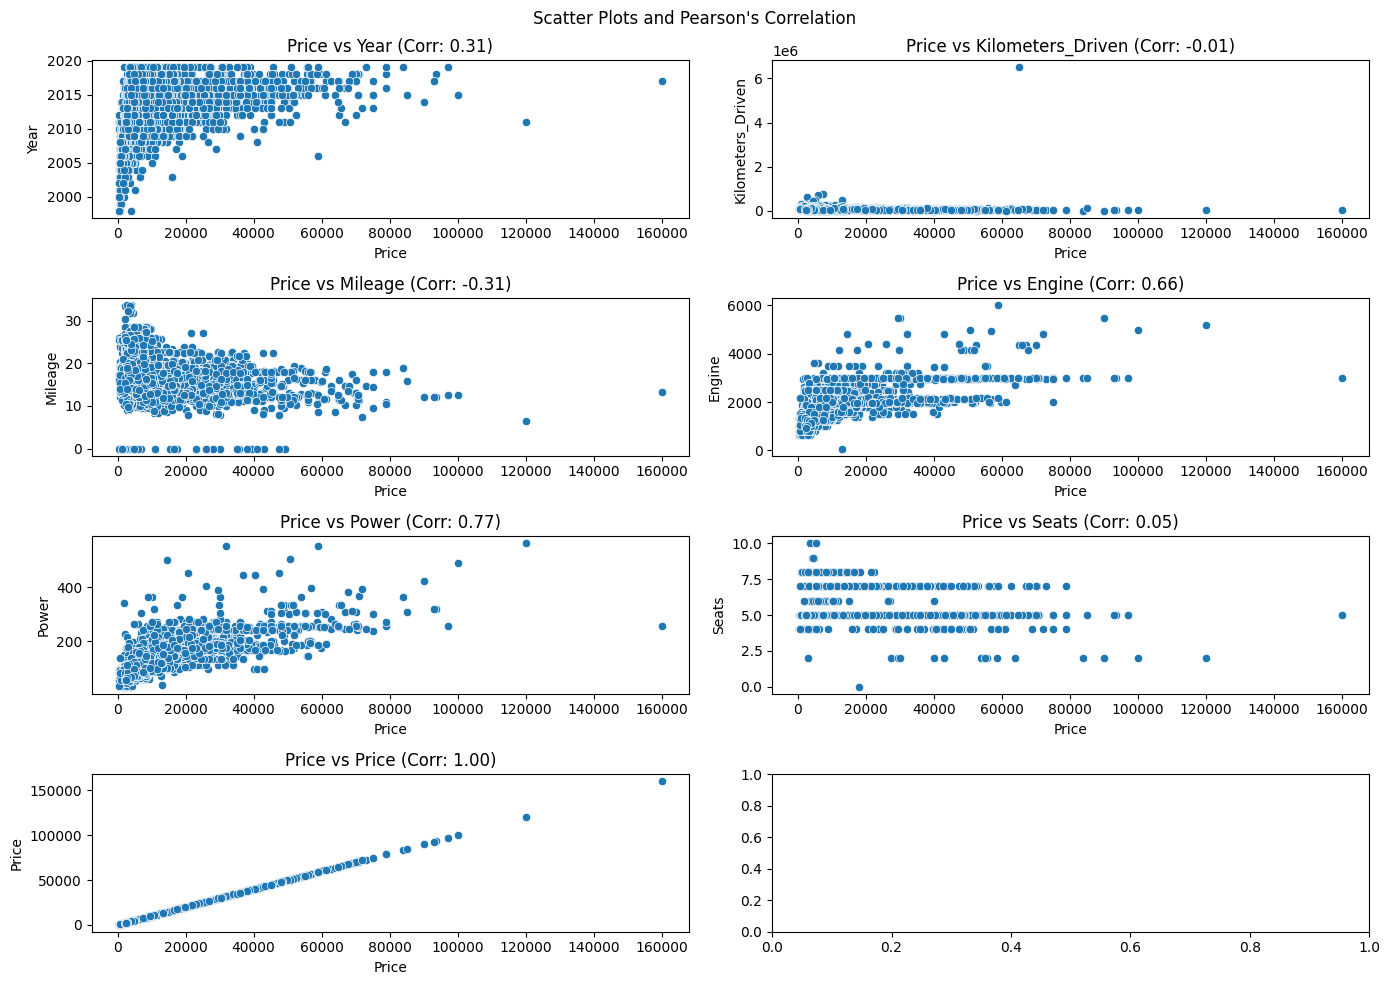

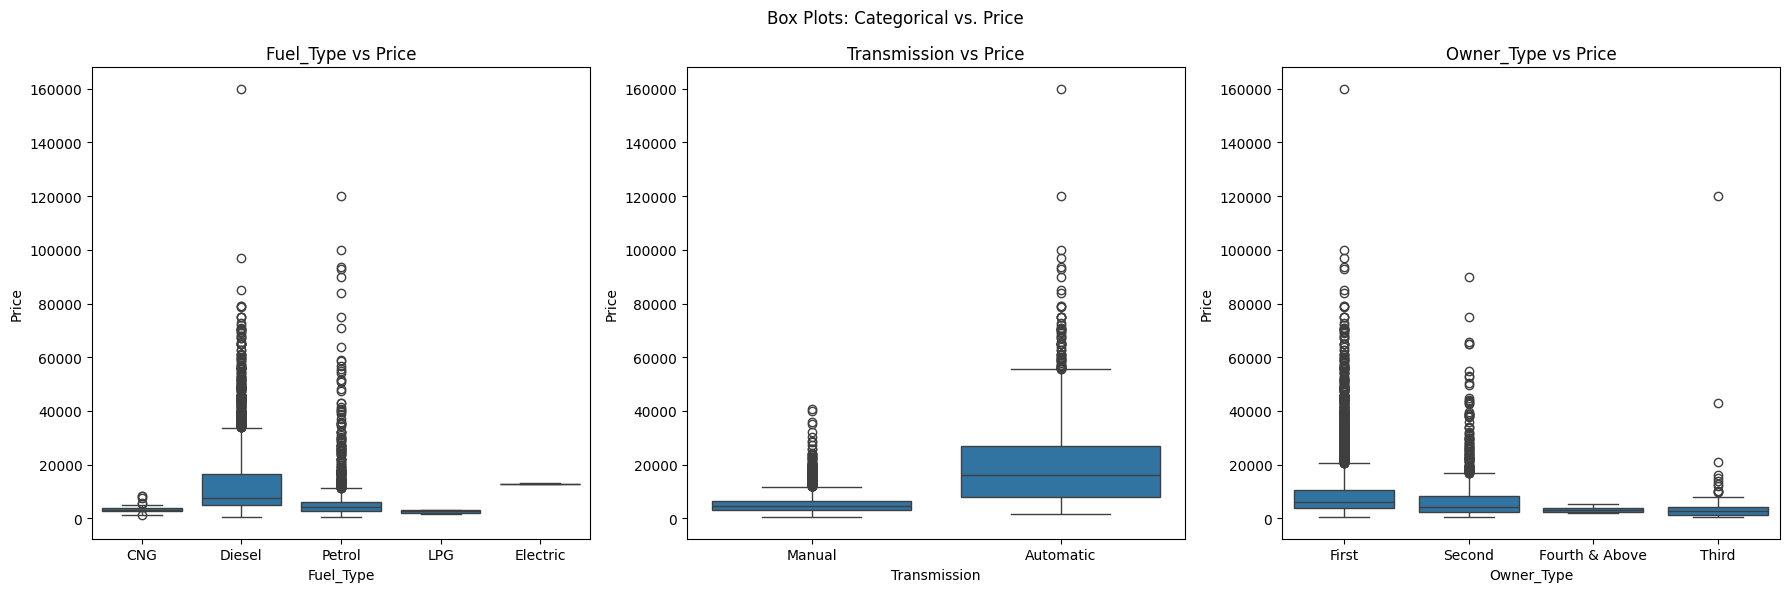

In [ ]:
# Calculate Pearson's correlation matrix
corr_matrix = df_cleaned[continuousColumns].corr()

# Display correlation matrix
print("Pearson's Correlation Matrix:")
print(corr_matrix)

# Visualize relationships using scatter plots and correlation
num_plots = len(continuousColumns)  # Count of columns to plot
fig, axes = plt.subplots((num_plots + 1) // 2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten the axes array for easier indexing
fig.suptitle("Scatter Plots and Pearson's Correlation")

# Loop through each column to create scatter plots
for i, col in enumerate(continuousColumns):
    sns.scatterplot(x=df_cleaned['Price'], y=df_cleaned[col], ax=axes[i])
    axes[i].set_title(f'Price vs {col} (Corr: {corr_matrix["Price"][col]:.2f})')

# Adjust layout for better display
plt.tight_layout()
plt.show()

# Step 9: Box plots for Categorical vs. Continuous

# Create boxplots for Categorical vs. Continuous variables
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Box Plots: Categorical vs. Price")

for i, column in enumerate(categorical_columns):
    sns.boxplot(x=df_cleaned[column], y=df_cleaned['Price'], ax=axes[i])
    axes[i].set_title(f'{column} vs Price')

plt.tight_layout()
plt.show()

#ANOVA testing
##Definition:

A statistcal test used to assess the difference between the means of multiple groups.

If the p-value in the test is below 0.05 there is a significant relationship in the data. The F-Statistic also measures how different the groups are but is not as important as the p-value when determining the significance of the relationship.

---



By looping through all the categorical columns we can work out our ANOVA statistics. We start off bt grouping the price values by the categorical variables

    Stats.f_oneway(*groups)

Is used to perform the ANOVA test which includes the F-Statistic and the P-value

We then print the results using the list anova_results

Finally we check to see if any of the p-values are less than or equal to 0.05 as this means there is a strong relationship

As our results were so small we had to use :.3e to have the results be displayed in scientific notation.

In [ ]:
# Step 10: ANOVA Test (Statistical Feature Selection)

anova_results = {}
for column in categorical_columns:
    # Drop missing values from the target variable and group the data by the categorical variable
    groups = [group.dropna() for name, group in df_cleaned[[column, 'Price']].groupby(column)['Price']]

    # Perform ANOVA
    f_stat, p_value = stats.f_oneway(*groups)

    # Store the results
    anova_results[column] = {f'F-Statistic': f_stat, 'P-Value': p_value}

# Display the results
anova_results_df = pd.DataFrame(anova_results).T
print("ANOVA Test Results (Categorical vs. Continuous - Price):")
print(anova_results_df)

# Interpret the p-values
significance_level = 0.05
print("\nInterpretation of results:")
for column, result in anova_results.items():
    if result['P-Value'] < significance_level:
        print(f"Reject the null hypothesis for {column}. Significant relationship found (P-Value: {result['P-Value']:.3e}).")
    else:
        print(f"Fail to reject the null hypothesis for {column}. No significant relationship (P-Value: {result['P-Value']:.3e}).")

ANOVA Test Results (Categorical vs. Continuous - Price):
              F-Statistic        P-Value
Fuel_Type      173.451642  8.146027e-141
Transmission  3147.220148   0.000000e+00
Owner_Type      19.282982   1.934931e-12

Interpretation of results:
Reject the null hypothesis for Fuel_Type. Significant relationship found (P-Value: 8.146e-141).
Reject the null hypothesis for Transmission. Significant relationship found (P-Value: 0.000e+00).
Reject the null hypothesis for Owner_Type. Significant relationship found (P-Value: 1.935e-12).


#Finding the best AI model

Import the required models from Sklearn which is a model building, evaluation and preprocessing API allowing us to access the AI models and accuracy tools

To get our X values for training we get all numerical values and drop price as it is our target variable

We found some more columns with missing data so we use the Sklearn function of impute which institues the mean into the data to make sure we don't have any data with invalid data.

We split the data into using 80% of the data provided for training and 20% for testing to get the accuracy of each model.

Since some of the models we use are sensitive to feature scales, the coninous features have to be scaled by using StandardScaler from the Sklearn API.

To choose the 5 models we want to train we start a set with all the models.

We create the variable for the best model and set it to = None to start

We also set the best score to negative infinity to make sure that we get a value stored as our best score.

we loop through the set of models training them using use

    model.fit()

We use the X values to teach the model about what the price(y value) should be based on the X values.

we then use the last 20% of the data to test the model using

    model.predict()

to give us data to test the models accuracy.

We use two metrics to to measure each model


*   R-sqaured

Measures the proportion of variance in the target variable that is predicted from the data from the X values. The higher the score the better the model
*   Mean Absolute Error(MAE)

Measures the average difference between the predictions and the actual values highlighting errors

We use the R-Squared to calculate the most accurate model and save the best score allowing for the program to make sure that it also has the best model saved while looping through. recording the name of the model and its R-Squared Value


#Joblib
    import joblib

We import joblib so that we can save our file using:

    joblib.dump(best_model_instance, 'best_model.pkl')

Which creates a .pkl which is a serialised file allowing for the model to be used anywhere.

In [ ]:
# Import necessary libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer


# Separate target data (Price) from predictive data (continuous columns)
continuousColumns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
continuousColumns = continuousColumns.drop('Price')

X = df_cleaned[continuousColumns]
y = df_cleaned['Price']

print(X.head())
print("Price")
print(y.head())

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
joblib.dump(scaler, 'scaler.pkl')


# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regressor": SVR()
}

# Initialize the best model instance and its score
best_model_instance = None
best_score = float('-inf')  # We aim to maximize R-squared score
results = {}

# Train models and evaluate performance
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store the results
    results[name] = {'R2 Score': r2, 'MAE': mae}

    # Update the best model if current model performs better
    if r2 > best_score:
        best_score = r2
        best_model_instance = model  # Store the actual model object

# Output the results
print("Model performance:")
for model, metrics in results.items():
    print(f"{model}: R2 Score = {metrics['R2 Score']:.4f}, MAE = {metrics['MAE']:.4f}")

if best_model_instance is not None:
    print(f"\nBest model: {best_model_instance.__class__.__name__} with R2 Score = {best_score:.4f}")
    # Save the best model to a file
    import joblib
    joblib.dump(best_model_instance, 'best_model.pkl')
else:
    print("No best model found.")



   Year  Kilometers_Driven  Mileage  Engine   Power  Seats
0  2010              72000    26.60   998.0   58.16    5.0
1  2015              41000    19.67  1582.0  126.20    5.0
2  2011              46000    18.20  1199.0   88.70    5.0
3  2012              87000    20.77  1248.0   88.76    7.0
4  2013              40670    15.20  1968.0  140.80    5.0
Price
0     1750.0
1    12500.0
2     4500.0
3     6000.0
4    17740.0
Name: Price, dtype: float64
Model performance:
Linear Regression: R2 Score = 0.6601, MAE = 3925.5029
Decision Tree: R2 Score = 0.7427, MAE = 2139.5169
Random Forest: R2 Score = 0.9047, MAE = 1637.0016
K-Nearest Neighbors: R2 Score = 0.8611, MAE = 1885.2010
Support Vector Regressor: R2 Score = -0.0862, MAE = 5772.4805

Best model: RandomForestRegressor with R2 Score = 0.9047


#Graphing Model Results

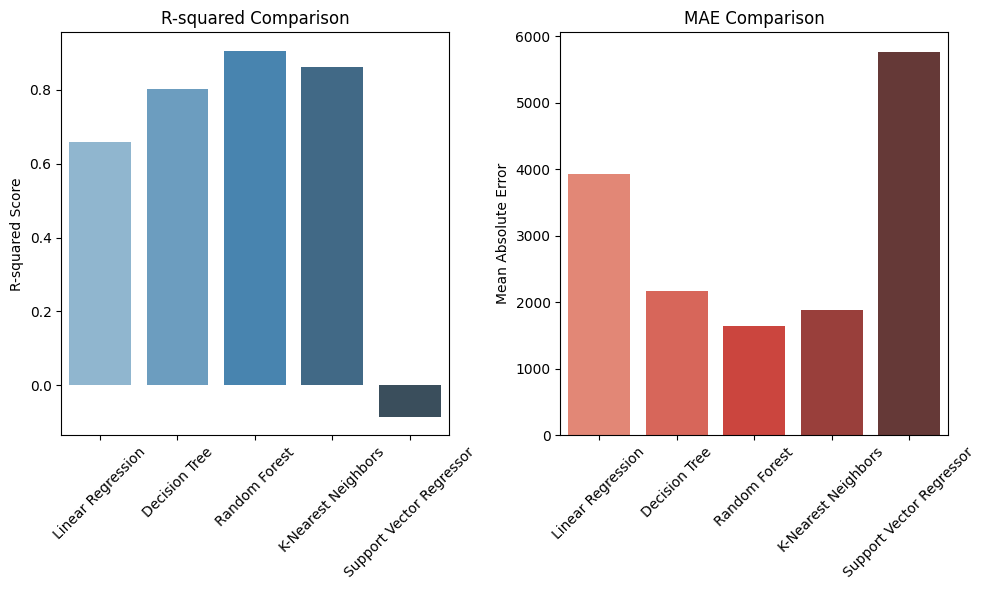

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'results' dictionary contains the model names and their R2 Score and MAE
model_names = list(results.keys())
r2_scores = [metrics['R2 Score'] for metrics in results.values()]
mae_scores = [metrics['MAE'] for metrics in results.values()]

# Plot R-squared scores
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)  # Create subplot for R2 scores
sns.barplot(x=model_names, y=r2_scores, hue=model_names, palette="Blues_d", dodge=False)
plt.title('R-squared Comparison')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove legend since hue is redundant

# Plot MAE scores
plt.subplot(1, 2, 2)  # Create subplot for MAE
sns.barplot(x=model_names, y=mae_scores, hue=model_names, palette="Reds_d", dodge=False)
plt.title('MAE Comparison')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove legend since hue is redundant

plt.tight_layout()
plt.show()


#Testing on new data
To fully test our selected model we open the new data set test-data.csv

This is a whole file of unseen data, we grab all the continous data and fill any missing data.

We also scale the new data to make sure it as similar to the training data.

We then check to confirm that we have got a best model saved. If we do:
we use the model to predict the price of the cars using unseen data.


In [ ]:

# Load the new test dataset
test_data = pd.read_csv('test-data.csv')

# Perform the same preprocessing on the test data
test_data_cleaned = test_data.select_dtypes(include=['float64', 'int64'])

# Ensure test_data_cleaned has the same columns as the training data
test_data_cleaned = test_data_cleaned.reindex(columns=continuousColumns, fill_value=np.nan)

# Handle missing values in new test data
X_new = imputer.transform(test_data_cleaned)

# Scale the new test data
X_new_scaled = scaler.transform(X_new)

# Make predictions on the new test data using the best model, if available
if best_model_instance is not None:
    predictions = best_model_instance.predict(X_new_scaled)

    # Output the predictions
    print("Predictions on test-data.csv:")
    print(predictions)

else:
    print("No best model available for predictions.")

Predictions on test-data.csv:
[19535.3         7086.53333333 10121.2        ...  7787.53333333
  7438.73333333  8221.9       ]


We allow for users to input information so they can now properly use the app to check what the car prices are based on the X featues and give them a price.

In [ ]:
if best_model_instance is not None:
    print("\nPlease enter values for the following features:")
    user_input = []

    # Collect user input for each feature in continuousColumns
    for feature in continuousColumns:
        value = float(input(f"Enter value for {feature}: "))
        user_input.append(value)

    # Convert user input into a Pandas DataFrame with appropriate feature names
    user_input_df = pd.DataFrame([user_input], columns=continuousColumns)

    # Handle missing values (if any) in user input
    user_input_df = imputer.transform(user_input_df)

    # Scale the input
    user_input_scaled = scaler.transform(user_input_df)

    # Make prediction using the best model
    user_prediction = best_model_instance.predict(user_input_scaled)

    print(f"\nPredicted Price based on your input: {user_prediction[0]:.2f}")
else:
    print("No best model available for predictions.")


Please enter values for the following features:
Enter value for Year: 2019
Enter value for Kilometers_Driven: 1000
Enter value for Mileage: 50
Enter value for Engine: 500
Enter value for Power: 1000
Enter value for Seats: 5

Predicted Price based on your input: 72007.40


# Creating a functioning GUI with TKinter

To allow for this model to be used by users who may be unfamiliar with coding, an app version with a functioning GUI has been made.

The process includes re-writing the of input variables to account for TKinter's own functions. Additionally the ideal model and scaler is imported ahead of time, both to save processing power, and greatly reduce the amount of code needed for the python file.

Once the .pkl files are read, the GUI opens, allowing for users to estimate the price of used cars.

In [ ]:
from tkinter import Tk, Label, Entry, Button
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Load the model and the saved scaler
best_model_instance = joblib.load('firstrun.pkl')
scaler = joblib.load('scaler.pkl')  # Load the scaler

# Function to convert user input to a dictionary, scale it, and make a prediction
def convert_to_dict(values, results_text):
    try:
        # Convert user input to numerical values
        user_input = [float(value) if value else 0 for value in values]

        # Create a DataFrame from user input
        user_input_frame = pd.DataFrame([user_input], columns=["Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats"])

        # Convert the DataFrame to a NumPy array before scaling (to avoid feature names)
        user_input_array = user_input_frame.values

        # Scale the user input using StandardScaler (pre-fitted during training)
        scaled_input = scaler.transform(user_input_array)

        # Make a prediction using the scaled input
        user_prediction = best_model_instance.predict(scaled_input)


        # Display the prediction result
        results_text.config(text=f"${user_prediction[0]:.2f}", font="16")

    except ValueError as e:
        results_text.config(text="Please enter valid numbers for all fields.", font="16")
        print(f"ValueError: {e}")

# Class for the GUI
class EstimatorGUI:
    def __init__(self):
        window = Tk()
        window.title("Price Prediction Model")

        # Title text
        self.main_text = Label(window, text="Used Car Price Prediction Model", font=("Arial", 24, "bold"))
        self.main_text.grid(column=0, row=0, columnspan=2, pady=(0, 10), sticky="n")

        # Input fields and labels
        self.year_input = Entry(window)
        self.year_input.grid(column=1, row=1, sticky="e")
        self.year_text = Label(window, text="Enter value for Year: ", font=("Arial", 12))
        self.year_text.grid(column=0, row=1, sticky="w")

        self.kilometres_input = Entry(window)
        self.kilometres_input.grid(column=1, row=2, sticky="e")
        self.kilometres_text = Label(window, text="Enter value for Kilometres Driven: ", font=("Arial", 12))
        self.kilometres_text.grid(column=0, row=2, sticky="w")

        self.mileage_input = Entry(window)
        self.mileage_input.grid(column=1, row=3, sticky="e")
        self.mileage_text = Label(window, text="Enter value for Mileage: ", font=("Arial", 12))
        self.mileage_text.grid(column=0, row=3, sticky="w")

        self.engine_input = Entry(window)
        self.engine_input.grid(column=1, row=4, sticky="e")
        self.engine_text = Label(window, text="Enter value for Engine: ", font=("Arial", 12))
        self.engine_text.grid(column=0, row=4, sticky="w")

        self.power_input = Entry(window)
        self.power_input.grid(column=1, row=5, sticky="e")
        self.power_text = Label(window, text="Enter value for Power: ", font=("Arial", 12))
        self.power_text.grid(column=0, row=5, sticky="w")

        self.seats_input = Entry(window)
        self.seats_input.grid(column=1, row=6, sticky="e")
        self.seats_text = Label(window, text="Enter value for Seats: ", font=("Arial", 12))
        self.seats_text.grid(column=0, row=6, sticky="w")

        # Button to estimate the price
        self.estimate_button = Button(window, text="Estimate", command=self.calculate)
        self.estimate_button.grid(row=7, column=0, sticky="nsew", columnspan=2, padx=0, pady=(10, 0))

        # Labels to display results
        self.results_text = Label(window, text="Predicted Price based on your input: ", font=("Arial", 14))
        self.results_text.grid(column=0, row=8, sticky="n", pady=30, columnspan=2)

        self.results = Label(window, text="", font=("Arial", 16))
        self.results.grid(column=0, row=9, sticky="n", pady=(0, 30), columnspan=2)

        window.mainloop()

    # Function to capture user input and make a prediction
    def calculate(self):
        # Get values from the input fields
        year = self.year_input.get()
        kilometres_driven = self.kilometres_input.get()
        mileage = self.mileage_input.get()
        engine = self.engine_input.get()
        power = self.power_input.get()
        seats = self.seats_input.get()

        try:
            print("Calculate is called.")
            new_values = [
                year,
                kilometres_driven,
                mileage,
                engine,
                power,
                seats,
            ]
            print(f"Year: '{year}', Kilometres Driven: '{kilometres_driven}', "
                  f"Mileage: '{mileage}', Engine: '{engine}', "
                  f"Power: '{power}', Seats: '{seats}'")

            # Check for missing input
            if any(not value for value in new_values):
                self.results.config(text="Please fill in all fields.", font="12")
                return

            # Convert the input and calculate the price prediction
            convert_to_dict(new_values, self.results)

        # Handle any exceptions that occur during the calculation
        except Exception as e:
            print(f"An error occurred: {e}")

# Run the GUI
EstimatorGUI()
